# Project: Computer Vision - Image classification using CNNs in Keras

####Import Libraries####

In [ ]:
from PIL import Image, ImageEnhance
import os

: 

In [1]:
# Checking working directory
import os
cwd = os.getcwd()
print (cwd)

c:\Users\bradr\Desktop\Image_resizing_multiple


In [2]:
source_folder = (r"C:\\Users\\bradr\\Dropbox\\AIML_Py\\My Projects\\Image_resizing_multiple\\old_photos\\")
destination_folder = (r"C:\\Users\\bradr\\Dropbox\\AIML_Py\\My Projects\\Image_resizing_multiple\\new_photos\\")
directory = os.listdir(source_folder)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\\\Users\\\\bradr\\\\Dropbox\\\\AIML_Py\\\\My Projects\\\\Image_resizing_multiple\\\\old_photos\\\\'

In [3]:
for item in directory:
    new_image_width=2400
    new_image_height=1600
    img = Image.open(source_folder + item)
    imgResize = img.resize((new_image_width, new_image_height), Image.ANTIALIAS)
    imgResize.save(destination_folder + item[:-4] +'.jpg', quality = 90)

NameError: name 'directory' is not defined

In [114]:
for item in directory:
    img = Image.open(source_folder + item)
#     factor = 2
    
    enhancer = ImageEnhance.Sharpness(img)
    enhanced_img = enhancer.enhance(8.0)
    
    
#     ehanced_img.save(str(destination_folder) + item[:-4] +'.jpg', quality = 90)
    
#     ehanced_img.save(destination_folder + item[:-4] +'.jpg', quality = 90)
    
    
    
#     cl2 = cv2.resize(enhanced_im, (1024,1024), interpolation = cv2.INTER_CUBIC)
#     cv2.imwrite(f'{other_dir}/enhanced_{img_id}.png',cl2)
    
    
    
    
    
#     imgResize = img.enhancer.enhance(factor)
#     imgResize.save(destination_folder + item[:-4] +'.jpg', quality = 90)

In [ ]:
stop

In [120]:
im = Image.open("20171022_104541.jpg")

In [122]:
enhancer = ImageEnhance.Sharpness(im)

factor = 1
im_s_1 = enhancer.enhance(factor)
# im_s_1.save('original-image-1.png');

factor = 0.05
im_s_1 = enhancer.enhance(factor)
# im_s_1.save('blurred-image.png');

factor = 8
im_s_1 = enhancer.enhance(factor)
im_s_1.save('20171022_104541_updated.png');

In [ ]:
stop

In [124]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [125]:
# Checking working directory
import os
cwd = os.getcwd()
print (cwd)

C:\Users\bradr\Dropbox\AIML_Py\My Projects\Image_resizing_multiple


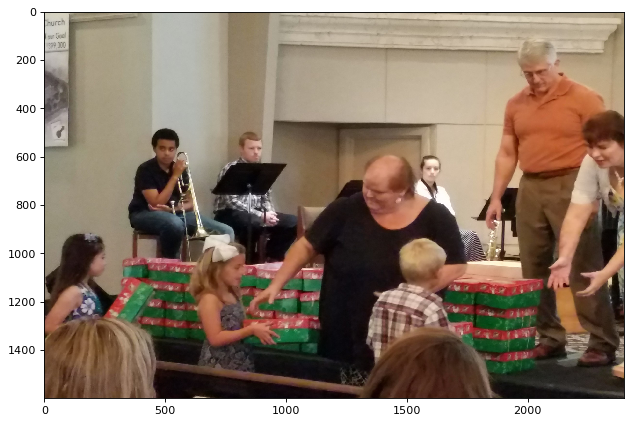

In [126]:
picture = imread('20171022_104541.jpg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(picture);

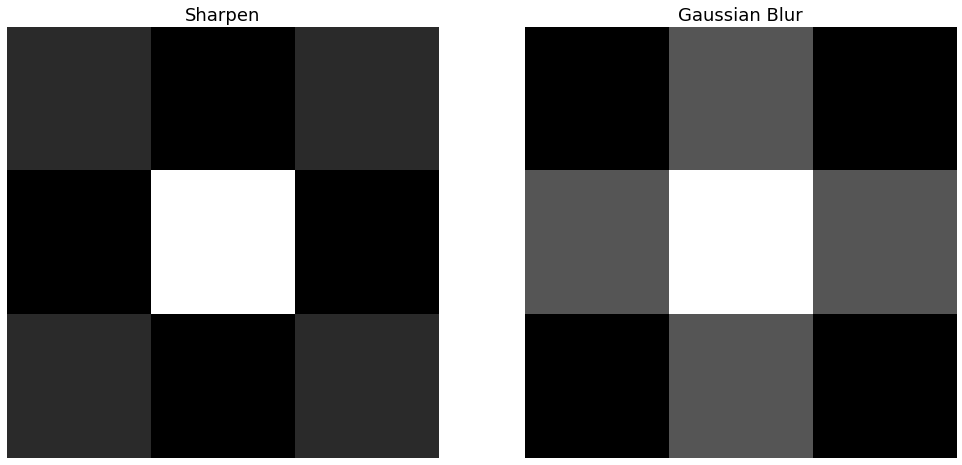

In [127]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize = 18)
    
ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur', fontsize = 18)
    
[axi.set_axis_off() for axi in ax.ravel()];

In [128]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image
# multi_convolver(picture, gaussian, 2)

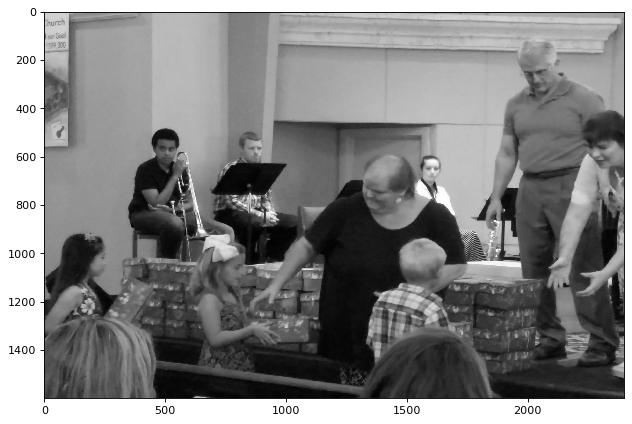

In [129]:
picture_grey = rgb2gray(picture)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(picture_grey);

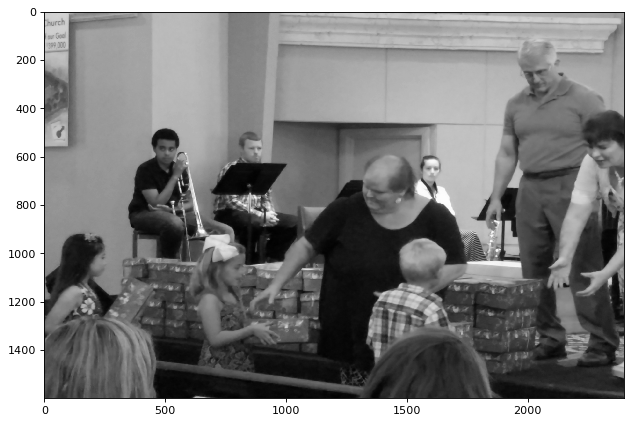

In [130]:
convolved_image = multi_convolver(picture_grey, gaussian, 2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(convolved_image);

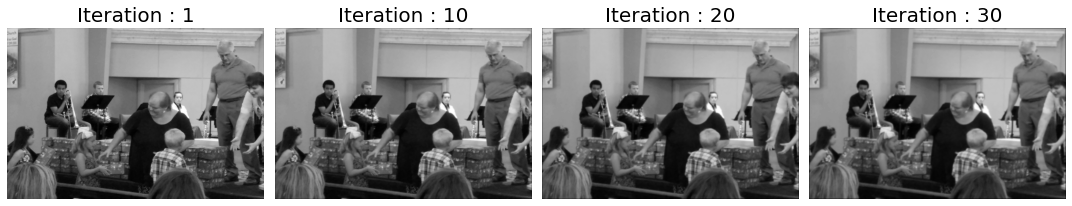

In [131]:
def convolution_plotter(image, kernel):
    iterations = [1,10,20,30]
    f_size = 20
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize =
                     f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]), 
                  cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()
    
convolution_plotter(picture_grey, gaussian)

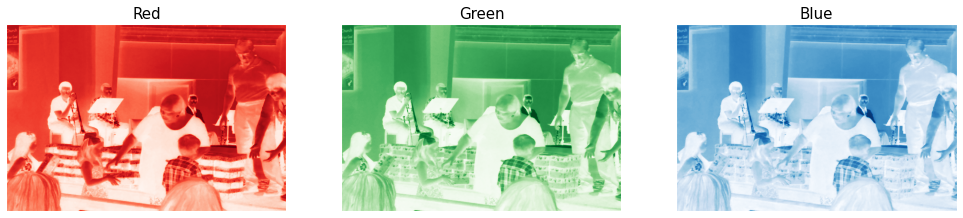

In [132]:
def convolver_rgb(image, kernel, iterations = 1):
    convolved_image_r = multi_convolver(image[:,:,0], kernel,
                                        iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel, 
                                        iterations)
    convolved_image_b  = multi_convolver(image[:,:,2], kernel, 
                                         iterations)
    
    reformed_image = np.dstack((np.rint(abs(convolved_image_r)), 
                                np.rint(abs(convolved_image_g)), 
                                np.rint(abs(convolved_image_b)))) / 255
   
                               
                     
    fig, ax = plt.subplots(1,3, figsize = (17,10))
    
    ax[0].imshow(abs(convolved_image_r), cmap='Reds')
    ax[0].set_title(f'Red', fontsize = 15)
    
    ax[1].imshow(abs(convolved_image_g), cmap='Greens')
    ax[1].set_title(f'Green', fontsize = 15)
    
    ax[2].imshow(abs(convolved_image_b), cmap='Blues')
    ax[2].set_title(f'Blue', fontsize = 15)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    return np.array(reformed_image).astype(np.uint8)
convolved_rgb_gauss = convolver_rgb(picture, gaussian, 2)

In [133]:
# plt.figure(num=None, figsize=(18, 16), dpi=80)
# imshow(convolved_rgb_gauss);

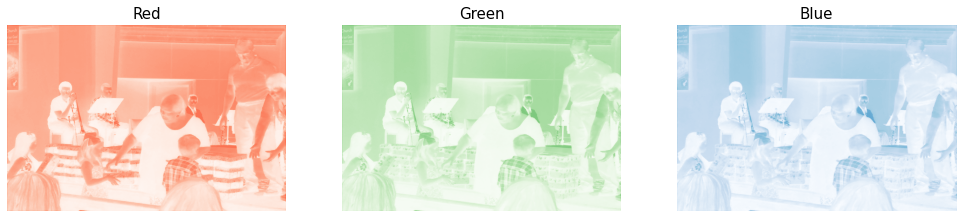

In [134]:
convolved_rgb_sharpen = convolver_rgb(picture, sharpen, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


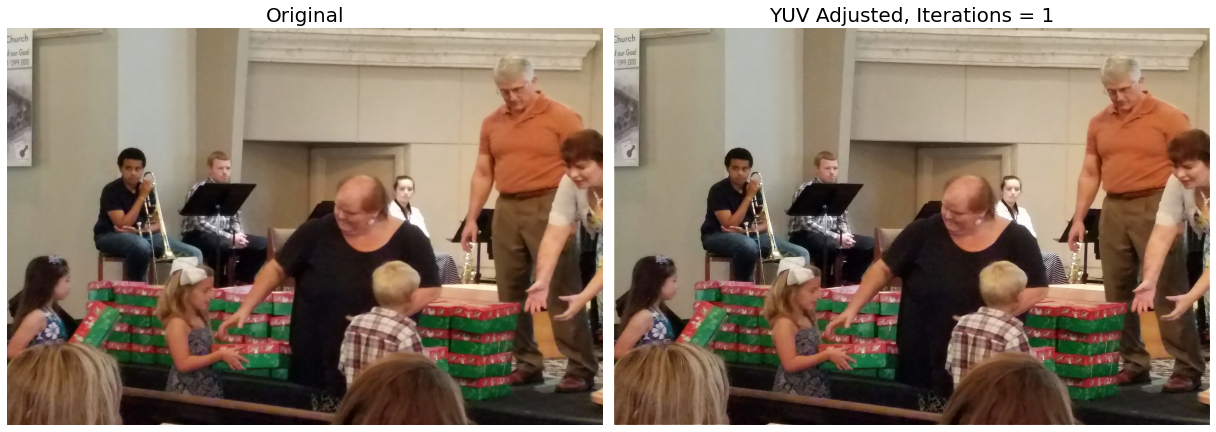

In [135]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
    final_image = yuv2rgb(img_yuv)
                               
    fig, ax = plt.subplots(1,2, figsize = (17,10))
    
    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize = 20)
    
    ax[1].imshow(final_image);
    ax[1].set_title(f'YUV Adjusted, Iterations = {iterations}', 
                    fontsize = 20)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()
    
    return final_image
final_image = convolver_rgb(picture, sharpen, iterations = 1)




In [136]:
from PIL import Image

basewidth = 600
img = Image.open('matt.jpg')
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)
img.save('resized_matt.jpg')

In [137]:
from PIL import Image

baseheight = 1120
img = Image.open('matt.jpg')
hpercent = (baseheight / float(img.size[1]))
wsize = int((float(img.size[0]) * float(hpercent)))
img = img.resize((wsize, baseheight), Image.ANTIALIAS)
img.save('resized_matt.jpg')